## **Polynomial regression - overfitting and underfitting**'

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

samples = 100
X = np.random.uniform(-3, 3, (samples, 1))
f = lambda x: x**2 + 0.5*x + 3 
y = f(X) + np.random.randn(samples, 1)


<Axes: title={'center': '$y = x^2+0.5x + 3 + \\epsilon$'}, xlabel='x', ylabel='y'>

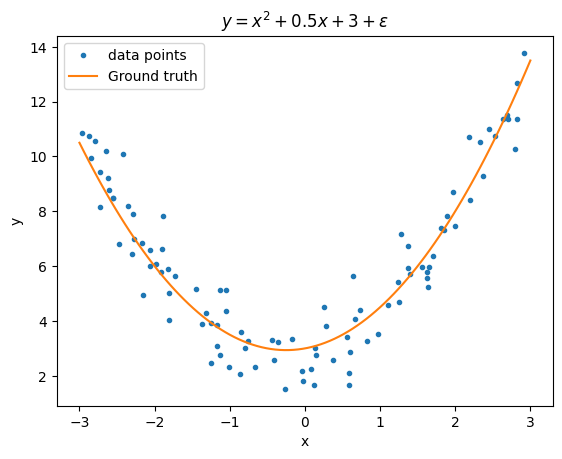

In [2]:
def draw_data():

    fig, ax = plt.figure(), plt.axes()
    ax.plot(X,y, ".", label= "data points")
    x = np.linspace(-3, 3, 100).reshape(-1, 1)
    ax.plot(x, f(x), label= "Ground truth")
    ax.set(title= r"$y = x^2+0.5x + 3 + \epsilon$", xlabel= "x", ylabel= "y")
    ax.legend()

    return ax

draw_data()

## **Polynomial regression**

---

In [3]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_instance = PolynomialFeatures(degree=2, include_bias=False)

polynomial_features = polynomial_instance.fit_transform(X)
polynomial_features

array([[-7.52759287e-01,  5.66646544e-01],
       [ 2.70428584e+00,  7.31316190e+00],
       [ 1.39196365e+00,  1.93756281e+00],
       [ 5.91950905e-01,  3.50405874e-01],
       [-2.06388816e+00,  4.25963433e+00],
       [-2.06403288e+00,  4.26023172e+00],
       [-2.65149833e+00,  7.03044338e+00],
       [ 2.19705687e+00,  4.82705891e+00],
       [ 6.06690070e-01,  3.68072842e-01],
       [ 1.24843547e+00,  1.55859111e+00],
       [-2.87649303e+00,  8.27421218e+00],
       [ 2.81945911e+00,  7.94934969e+00],
       [ 1.99465584e+00,  3.97865194e+00],
       [-1.72596534e+00,  2.97895634e+00],
       [-1.90905020e+00,  3.64447265e+00],
       [-1.89957294e+00,  3.60837736e+00],
       [-1.17454654e+00,  1.37955958e+00],
       [ 1.48538590e-01,  2.20637127e-02],
       [-4.08329888e-01,  1.66733298e-01],
       [-1.25262516e+00,  1.56906979e+00],
       [ 6.71117368e-01,  4.50398522e-01],
       [-2.16303684e+00,  4.67872835e+00],
       [-1.24713211e+00,  1.55533850e+00],
       [-8.

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(polynomial_features, y)
model.coef_ # beta_1 och beta_2

array([[0.43366893, 1.06456263]])

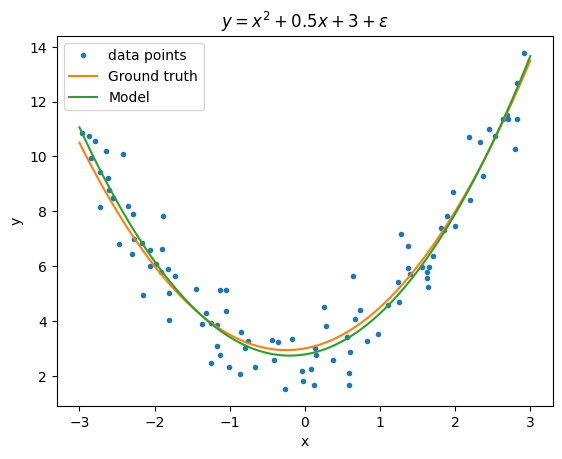

In [5]:
x = np.linspace(-3, 3, samples).reshape(-1, 1)
x_polynomial_features = polynomial_instance.transform(x)

y_pred = model.predict(x_polynomial_features)

ax = draw_data()
ax.plot(x, y_pred, label= "Model")
ax.legend()

## **Underfitting**

---

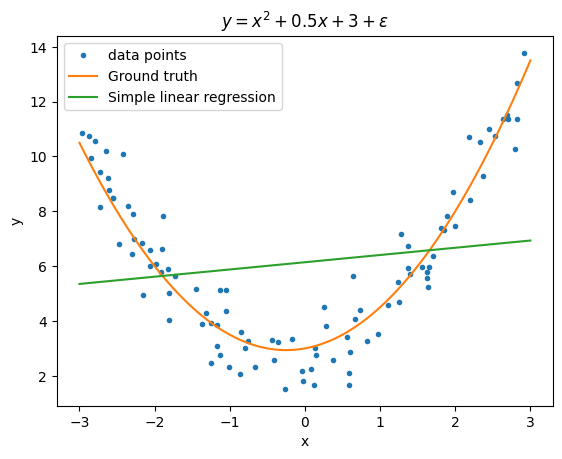

In [6]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(x)

ax = draw_data()
ax.plot(x, y_pred, label= "Simple linear regression")
ax.legend();

## **Overfitting**

---

X_features.shape=(100, 30)


[Text(0.5, 1.0, 'Overfitted, the model is too complex'), (1.0, 15.0)]

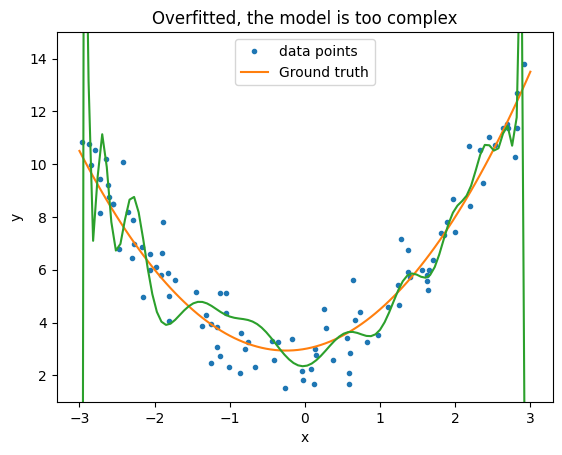

In [7]:
polynomial_instance = PolynomialFeatures(30, include_bias=False)
X_features = polynomial_instance.fit_transform(X)

print(f"{X_features.shape=}")

model = LinearRegression()
model.fit(X_features, y)

x_polynomial_features = polynomial_instance.transform(x)

y_pred = model.predict(x_polynomial_features)

ax = draw_data()
ax.plot(x, y_pred)
ax.set(title= "Overfitted, the model is too complex",ylim= [1, 15])

## **Choos a model**

---

In [8]:
np.random.seed(42)

samples = 10000

X = np.random.uniform(-3, 3, (samples, 1))
f = lambda x: x ** 4 + x ** 2 +0.5 * x + 3
y = f(X) + np.random.randn(samples, 1)

X.shape, y.shape

((10000, 1), (10000, 1))

## **Train|val|test split**

---

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((6700, 1), (1650, 1), (1650, 1), (6700, 1), (1650, 1), (1650, 1))

## **Elbow**

---

In [11]:
from sklearn.metrics import mean_squared_error

RMSE_val = []

for degree in range(1, 100):
    model_poly = PolynomialFeatures(degree, include_bias=False)
    train_features = model_poly.fit_transform(X_train)
    val_features = model_poly.fit_transform(X_val)
    model_linear_regression = LinearRegression()

    model_linear_regression.fit(train_features, y_train)

    y_pred_val = model_linear_regression.predict(val_features)

    RMSE_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))

    


Text(0.5, 1.0, 'RMSE on validation data for diffrent degree of polynomial')

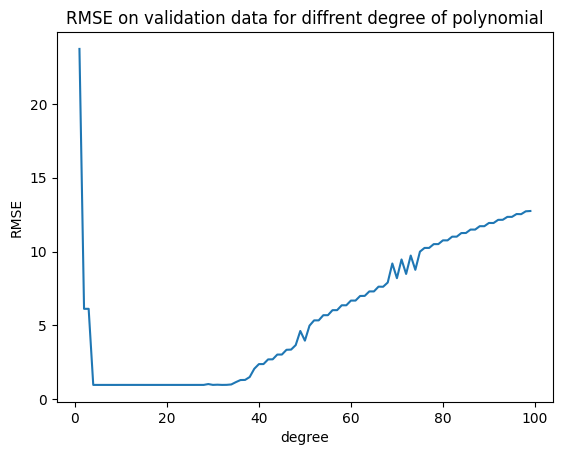

In [16]:
plt.plot(range(1, 100), RMSE_val)
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for diffrent degree of polynomial")

Text(0.5, 1.0, 'RMSE on validation data for diffrent degree of polynomial')

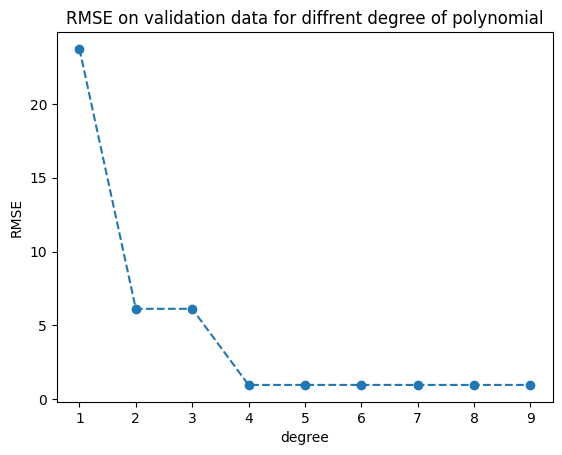

In [18]:
plt.plot(range(1, 10), RMSE_val[:9], "o--")
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for diffrent degree of polynomial")